In [1]:
import os
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
class graphin: 
    # returns array from xvg
    def processdatatoarray(self, filename, column=1, skip=24, smooth=False, stabalise=False):
        xvgout = pd.read_csv(filename, skiprows=skip, delim_whitespace=True)
        array = xvgout.to_numpy()
        
        average = []
        values = np.zeros(shape=(len(array)))
        for ii in range(len(array)):
            values[ii] = array[ii][column]
            if smooth is False:
                average.append(values[ii])
            else:
                if ii >= smooth and ii <= (len(array) - smooth):
                    av = 0
                    for jj in range (ii-smooth, ii+smooth, 1):
                        av += (array[jj][column])
                    if stabalise is True:
                        stab = 0
                        if array[0][column] > array[-1][column]:
                            stab = array[0][column]
                        else:
                            stab = array[-1][column]
                        average.append(av/smooth/stab)
                    else:
                        average.append(av/(2*smooth))
        return average
    
    # graphs things
    def graphnow(self, arrays, yaxis, xaxis="time (ns)", colour='-b'):
        plt.plot(arrays, colour)
        plt.xlabel(xaxis)
        plt.ylabel(yaxis)
        plt.savefig("images/" + yaxis + ".png",dpi=300)
        plt.show()


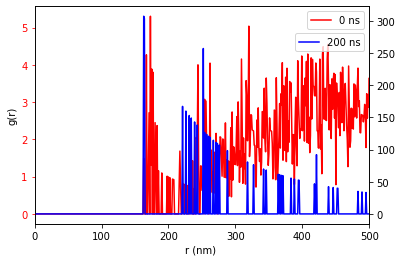

In [12]:
g = graphin()
array1 = g.processdatatoarray("rdf/rdf6970_b20000e25000.xvg", smooth=False, stabalise=False)
array2 = g.processdatatoarray("rdf/rdfptmg1f.xvg", smooth=False, stabalise=False)

fig, ax = plt.subplots()
plt.plot(array1, '-r', label="0 ns")
plt.xlabel("time (ns)")
plt.legend()
#plt.legend( bbox_to_anchor=(0.7, 0.9))
ax.tick_params('y', colors='b')
ax.set(xlim=(0, 500))
plt.xlabel('r (nm) ')
plt.ylabel('g(r)')

ax2 = ax.twinx()
plt.plot(array2, '-b', label="200 ns")
plt.legend( bbox_to_anchor=(1, 0.9))
#plt.axis('off')
ax.tick_params('y', colors='r')

plt.savefig("images/ions.png",dpi=300)

[0.9840000000000001, 1.965, 0.982, 0.0, 0.0, 0.982, 1.965, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.982, 0.0, 0.0, 0.0, 0.0, 0.0, 0.982, 0.0, 0.0, 1.965, 0.0, 0.0, 0.0, 0.983, 0.0, 0.0, 0.0, 0.0, 0.983, 0.983, 1.966, 0.0, 0.983, 0.0, 0.0]


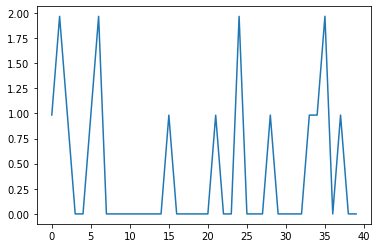

In [4]:
class rdfin:
    def create(self, begin, end, group1, group2):
        string = "gmx rdf -f simOne/OLysRNA_s500.xtc  -s simOne/topol.tpr -n rdf/index1.ndx -o "
        filename = "rdf/rdf" + str(group1) + str(group2) + "_b" + str(begin) + "e" + str(end)
        string += filename + ".xvg " + " -cn " + filename + "_cn.xvg"
        string += " -b " + str(begin) + " -e " + str(end) + " -ref " + str(group1) + " -sel " + str(group2)
        os.system(string)
    def findsum(self, filename, column=1, skip=25, bin1=150, bin2=170):
        xvgout = pd.read_csv(filename, skiprows=skip, delim_whitespace=True)
        array = xvgout.to_numpy()
        
        sumis = 0
        for ii in range(bin1, bin2, 1):
            sumis += array[ii][column]
        return sumis
    def findpoint(self, filename, column=1, skip=25, point=200):
        xvgout = pd.read_csv(filename, skiprows=skip, delim_whitespace=True)
        array = xvgout.to_numpy()
    
        return array[point][column]
    
rr = rdfin()

listn=[]
step=5000
for ii in range(0, 200000, step):
    #rr.create(begin=ii, end=(ii+step), group1=71, group2=72)
    file="rdf/rdf7172_b" + str(ii) + "e" + str(ii+step) + ".xvg"
    #listn.append(rr.findsum(file, bin1=200, bin2=300))
    listn.append(rr.findpoint(file, point=200))
print(listn)
plt.plot(listn)
plt.show()

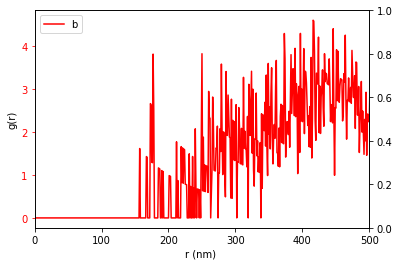

In [5]:
array1 = g.processdatatoarray("rdf/rdf7172_b0e5000.xvg", smooth=False, stabalise=False)
array2 = g.processdatatoarray("rdf/rdf6970_b0e5000.xvg", smooth=False, stabalise=False)

fig, ax = plt.subplots()
plt.plot(array1, '-r', label="b")
plt.xlabel("time (ns)")
plt.legend()
#plt.legend( bbox_to_anchor=(0.7, 0.9))
ax.tick_params('y', colors='b')
#ax.set(xlim=(160, 220), ylim=(0, .1))
ax.set(xlim=(0,500))
plt.xlabel('r (nm) ')
plt.ylabel('g(r)')

ax2 = ax.twinx()
#plt.plot(array2, '-b', label="e")
#plt.legend( bbox_to_anchor=(1, 0.9))
#plt.axis('off')
ax.tick_params('y', colors='r')


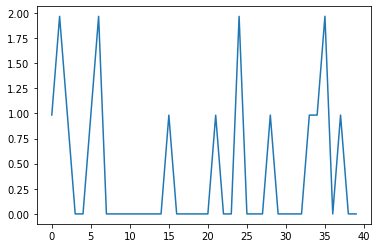

In [6]:
plt.show()
plt.plot(listn)
plt.show()